In [320]:
# convert in python script by: jupyter nbconvert --to script Visu_output.ipynb
# run python script by: python3 Visu_output.py --interactive=0 --printvar=-1-2- 
# or python3 Visu_output.py --interactive=0 --printvar=all (to print all variables)

# Import the necessary packages and modules
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

from matplotlib import rc
rc('text', usetex=True)


import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

print_interactive = True
#variables_to_display="all"
variables_to_display="all"

# for reading arguments on command line (use as a script possibly called from the program)
import sys
import re
print(sys.argv[0])
nb_arguments=len(sys.argv)
if (nb_arguments > 1):
    for i in range(1,nb_arguments):
        print(sys.argv[i])
        if re.match("--interactive=*",sys.argv[i]):
            print_interactive = int((sys.argv[i]).split( "=", 1 )[1])
        if re.match("--printvar=*",sys.argv[i]):
            variables_to_display= (sys.argv[i]).split( "=", 1 )[1]
            
os.chdir('../output')
#print(glob.glob('x*outer.out'))
filenames_outer = sorted(glob.glob('x*outer.out'))
filenames_exact = sorted(glob.glob('x*exact.out'))
filenames_inner = sorted(glob.glob('x*inner.out'))
filenames_inner_minimal = sorted(glob.glob('x*inner_minimal.out'))
filenames_outer_minimal = sorted(glob.glob('x*outer_minimal.out'))
filenames_inner_robust = sorted(glob.glob('x*inner_robust.out'))
filenames_outer_robust = sorted(glob.glob('x*outer_robust.out'))

/Users/sylvie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py
-f
/Users/sylvie/Library/Jupyter/runtime/kernel-3325ac18-b8f3-4161-8406-0704db199ff7.json


In [321]:
    width_in_inches = 12
    height_in_inches = 9
    dots_per_inch = 100
    #fig = plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
    from matplotlib.patches import Rectangle, Polygon
    from matplotlib.collections import PatchCollection
    import os.path
    from os import path

In [322]:
width_in_inches = 12
height_in_inches = 9
dots_per_inch = 100
#fig = plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection



def print_xyz(varx,vary,varz,print_robust,print_minimal):
   # fig, ax = plt.subplots(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
    fig = plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
    ax = Axes3D(fig)
    
    points = np.array([[-1, -1, -1],
            [1, -1, -1 ],
            [1, 1, -1],
            [-1, 1, -1],
            [-1, -1, 1],
            [1, -1, 1 ],
            [1, 1, 1],
            [-1, 1, 1]])
    
    # print maximal outer and inner approximations for each component separately
    
    fx_outer = varx + 'outer.out'
    fy_outer = vary + 'outer.out'
    fz_outer = varz + 'outer.out'
    
    if (path.isfile(fx_outer) and path.isfile(fy_outer) and path.isfile(fz_outer)):
        with open(fx_outer, 'r') as x_outer, open(fy_outer, 'r') as y_outer , open(fz_outer, 'r') as z_outer:
            linesx_outer = x_outer.readlines()
            tx_outer = [float(line.split()[0]) for line in linesx_outer]
            xmin_outer = [float(line.split()[1]) for line in linesx_outer]
            xmax_outer = [float(line.split()[2]) for line in linesx_outer]
            linesy_outer = y_outer.readlines()
            ty_outer = [float(line.split()[0]) for line in linesy_outer]
            ymin_outer = [float(line.split()[1]) for line in linesy_outer]
            ymax_outer = [float(line.split()[2]) for line in linesy_outer]
            linesz_outer = z_outer.readlines()
            tz_outer = [float(line.split()[0]) for line in linesz_outer]
            zmin_outer = [float(line.split()[1]) for line in linesz_outer]
            zmax_outer = [float(line.split()[2]) for line in linesz_outer]
                  
            for x1,x2,y1,y2,z1,z2 in zip(xmin_outer,xmax_outer,ymin_outer,ymax_outer,zmin_outer,zmax_outer):
                P = [[(x2-x1)/2 , 0 ,  0],
                 [0 ,  (y2-y1)/2 ,  0],
                 [0 ,  0 ,  (z2-z1)/2]]
                
                Z = np.array([[(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
                  [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
                  [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
                  [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
                  [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
                  [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
                  [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
                  [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2]])
                
                for i in range(8): Z[i,:] += np.dot(points[i,:],P)

                # plot vertices
                #ax.scatter3D(Z[:, 0], Z[:, 1], Z[:, 2])

                # list of sides' polygons of figure
                verts = [[Z[0],Z[1],Z[2],Z[3]], 
                [Z[4],Z[5],Z[6],Z[7]], 
                [Z[0],Z[1],Z[5],Z[4]], 
                [Z[2],Z[3],Z[7],Z[6]], 
                [Z[1],Z[2],Z[6],Z[5]],
                [Z[4],Z[7],Z[3],Z[0]]]

                # plot sides
          #      ax.add_collection3d(Line3DCollection(verts, linewidths=1, label='outer-approximation'))
          #      ax.add_collection3d(Poly3DCollection(verts, facecolors='grey', linewidths=1, edgecolors='k', label='maximal outer-approximation', alpha=0.05))

    fxyz_inner = varx + vary + varz + 'inner_joint3d.out'
    if (path.isfile(fxyz_inner)):
         with open(fxyz_inner, 'r') as xyz_inner:
            linesxyz_inner = xyz_inner.readlines()    
            for line in linesxyz_inner:
                x1 = float(line.split()[2])
                x2 = float(line.split()[3])
                y1 = float(line.split()[4])
                y2 = float(line.split()[5])
                z1 = float(line.split()[6])
                z2 = float(line.split()[7])
                
                P = [[(x2-x1)/2 , 0 ,  0],
                 [0 ,  (y2-y1)/2 ,  0],
                 [0 ,  0 ,  (z2-z1)/2]]
                
                Z = np.array([[(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
                  [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
                  [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
                  [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
                  [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
                  [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
                  [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
                  [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2]])
                
                for i in range(8): Z[i,:] += np.dot(points[i,:],P)

                # plot vertices
                #ax.scatter3D(Z[:, 0], Z[:, 1], Z[:, 2])

                # list of sides' polygons of figure
                verts = [[Z[0],Z[1],Z[2],Z[3]], 
                [Z[4],Z[5],Z[6],Z[7]], 
                [Z[0],Z[1],Z[5],Z[4]], 
                [Z[2],Z[3],Z[7],Z[6]], 
                [Z[1],Z[2],Z[6],Z[5]],
                [Z[4],Z[7],Z[3],Z[0]]]
                
                if re.match((line.split()[0]),'maximal'):
                    collection = Poly3DCollection(verts, linewidths=2, label='maximal inner-approximation', alpha=.025, zorder=0)
                    #collection.set_facecolor('lightblue')
                    collection.set_edgecolor('azure')
                    ax.add_collection3d(collection)
                if (re.match((line.split()[0]),'robust') and print_robust):  
                    ax.add_collection3d(Poly3DCollection(verts, facecolors='orange', linewidths=1, edgecolors='red', label='robust inner-approximation', alpha=1., zorder=10))
                
                if (re.match((line.split()[0]),'minimal') and print_minimal):  
                    ax.add_collection3d(Poly3DCollection(verts, facecolors='red', linewidths=1, edgecolors='r', label='minimal inner-approximation', alpha=0.5))        
            
    #ax.autoscale()
    plt.xlim([-3,2])
    #plt.xticks([-3,-1,1])
    plt.ylim([-2,3])
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.set_zlim([-4,2])
    ax.set_xlabel(r'$p_x$',fontsize=25)
    ax.set_ylabel(r'$p_y$',fontsize=25)
    ax.set_zlabel(r'$\theta$',fontsize=25)
    #plt.legend()
    f_output= varx + vary + varz
    plt.savefig(f_output)
    if (print_interactive):
        plt.show() 
    plt.close()
#print_xyz("x2","x6","x10")

/Users/sylvie/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


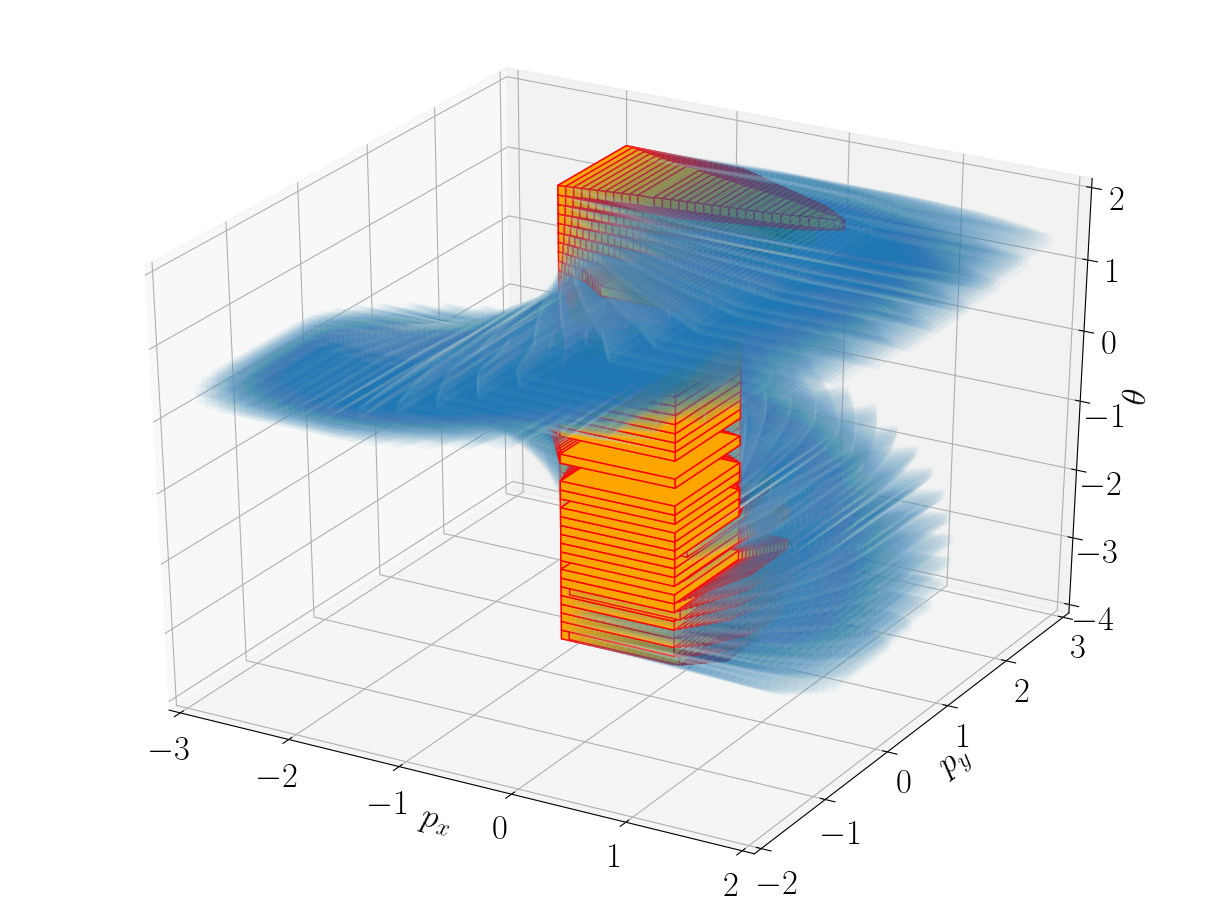

In [323]:
print_robust = True
print_minimal = False
# print joint ranges of variables to display
filenames_jointinner3d = sorted(glob.glob('*inner_joint3d.out'))
for f_inner in filenames_jointinner3d:
    variable = f_inner.rsplit( "inner_joint3d.out", 1 )[ 0 ]  # get variable name out of file names
   # print(variable)
    varxvary = variable.rsplit( "x", 1 )[ 0 ]
    varx = varxvary.rsplit( "x", 1 )[ 0 ]
    vary = 'x'+varxvary.rsplit( "x", 1 )[ 1 ]
    varz = 'x'+variable.rsplit( "x", 1 )[ 1 ]
    varx_nb = '-' + varx.split( "x", 1 )[1] + '-'
    vary_nb = '-' + vary.split( "x", 1 )[1] + '-'
    varz_nb = '-' + varz.split( "x", 1 )[1] + '-'
    if (re.match(varx_nb,variables_to_display) and re.match(vary_nb,variables_to_display) and re.match(varz_nb,variables_to_display)) or re.match("all",variables_to_display):
        print_xyz(varx,vary,varz,print_robust,print_minimal)